Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import Dataset

In [ ]:
df = pd.read_csv('/content/weather_forecast.csv')

In [ ]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


Categorical Naive Bayes without scikit-learn

Calculate Prior Probabilities and Likelihoods

In [ ]:
def calculate_prior_probabilities(df):
    class_counts = df['Play'].value_counts()
    total_count = len(df)
    prior_probabilities = class_counts / total_count
    return prior_probabilities

prior_probabilities = calculate_prior_probabilities(df)
print("\nPrior Probabilities:")
print(prior_probabilities)



Prior Probabilities:
Play
Yes    0.642857
No     0.357143
Name: count, dtype: float64


In [ ]:
def calculate_likelihoods(df):
    features = df.columns[:-1]
    likelihoods = {}
    for feature in features:
        feature_values = df[feature].unique()
        for value in feature_values:
            class_counts = df[df[feature] == value]['Play'].value_counts()
            for class_label, count in class_counts.items():
                likelihoods[(feature, value, class_label)] = count / df[df['Play'] == class_label].shape[0]
    return likelihoods

In [ ]:
likelihoods = calculate_likelihoods(df)
print("\nLikelihoods:")
for key, value in likelihoods.items():
    print(f"P({key[0]} = {key[1]} | Play = {key[2]}) = {value}")


Likelihoods:
P(Outlook = Sunny | Play = No) = 0.6
P(Outlook = Sunny | Play = Yes) = 0.2222222222222222
P(Outlook = Overcast | Play = Yes) = 0.4444444444444444
P(Outlook = Rain | Play = Yes) = 0.3333333333333333
P(Outlook = Rain | Play = No) = 0.4
P(Temperature = Hot | Play = No) = 0.4
P(Temperature = Hot | Play = Yes) = 0.2222222222222222
P(Temperature = Mild | Play = Yes) = 0.4444444444444444
P(Temperature = Mild | Play = No) = 0.4
P(Temperature = Cool | Play = Yes) = 0.3333333333333333
P(Temperature = Cool | Play = No) = 0.2
P(Humidity = High | Play = No) = 0.8
P(Humidity = High | Play = Yes) = 0.3333333333333333
P(Humidity = Normal | Play = Yes) = 0.6666666666666666
P(Humidity = Normal | Play = No) = 0.2
P(Windy = Weak | Play = Yes) = 0.6666666666666666
P(Windy = Weak | Play = No) = 0.4
P(Windy = Strong | Play = No) = 0.6
P(Windy = Strong | Play = Yes) = 0.3333333333333333


Classify a Test Instance

In [ ]:
def classify_instance(instance, prior_probabilities, likelihoods):
    instance_features = instance.index
    instance_values = instance.values
    class_probabilities = {}

    for class_label in prior_probabilities.index:
        class_prob = prior_probabilities[class_label]
        for feature, value in zip(instance_features, instance_values):
            key = (feature, value, class_label)
            class_prob *= likelihoods.get(key, 1e-5)
        class_probabilities[class_label] = class_prob

    # Normalize to get probabilities
    total_prob = sum(class_probabilities.values())
    for class_label in class_probabilities:
        class_probabilities[class_label] /= total_prob

    return class_probabilities

In [ ]:
test_data = pd.DataFrame([{"Outlook": "Sunny", "Temperature": "Cool", "Humidity": "High", "Windy": "Strong"}])
test_instance = test_data.iloc[0]

Predict the class for the test instance

In [ ]:
class_probabilities = classify_instance(test_instance, prior_probabilities, likelihoods)
print("\nClass Probabilities for Test Instance:")
print(class_probabilities)
predicted_class = max(class_probabilities, key=class_probabilities.get)
print("\nPredicted Class for Test Instance:")
print(predicted_class)


Class Probabilities for Test Instance:
{'Yes': 0.20458265139116202, 'No': 0.795417348608838}

Predicted Class for Test Instance:
No


Categorical Naive Bayes without scikit-learn

Import scikit-learn libraries

In [ ]:
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Label Encode Text Features to Numerical Features

In [ ]:
le_dict = {}
df_encoded = df.copy()
for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    le_dict[column] = le

Split the target column from the dataframe

In [ ]:
X = df_encoded.drop("Play", axis=1)
y = df_encoded["Play"]

Fit the dataset with the Categorical Naive Bayes Classifier

In [ ]:
model = CategoricalNB()
model.fit(X, y)

CategoricalNB()

Label Encode the test_data and predict the class of test instance

In [ ]:
test_data = pd.DataFrame([{"Outlook": "Sunny", "Temperature": "Cool", "Humidity": "High", "Windy": "Strong"}])
test_data_encoded = test_data.copy()
for column in test_data.columns:
    test_data_encoded[column] = le_dict[column].transform(test_data[column])

In [ ]:
predictions = model.predict(test_data_encoded)
print(le_dict["Play"].inverse_transform(predictions))

['No']


CATEGORICAL NAIVE BAYES WITH MUSHROOM DATASET FROM UCI ML REPOSITORY

INSTALL THE PACKAGE

In [ ]:
!pip install ucimlrepo

IMPORT THE DATASET AND EXPLORE FOR NULL VALUES

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [ ]:
df.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


In [ ]:
for col in df.columns:
  print(col, df[col].unique())

cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']
poisonous ['p' 'e']


In [ ]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


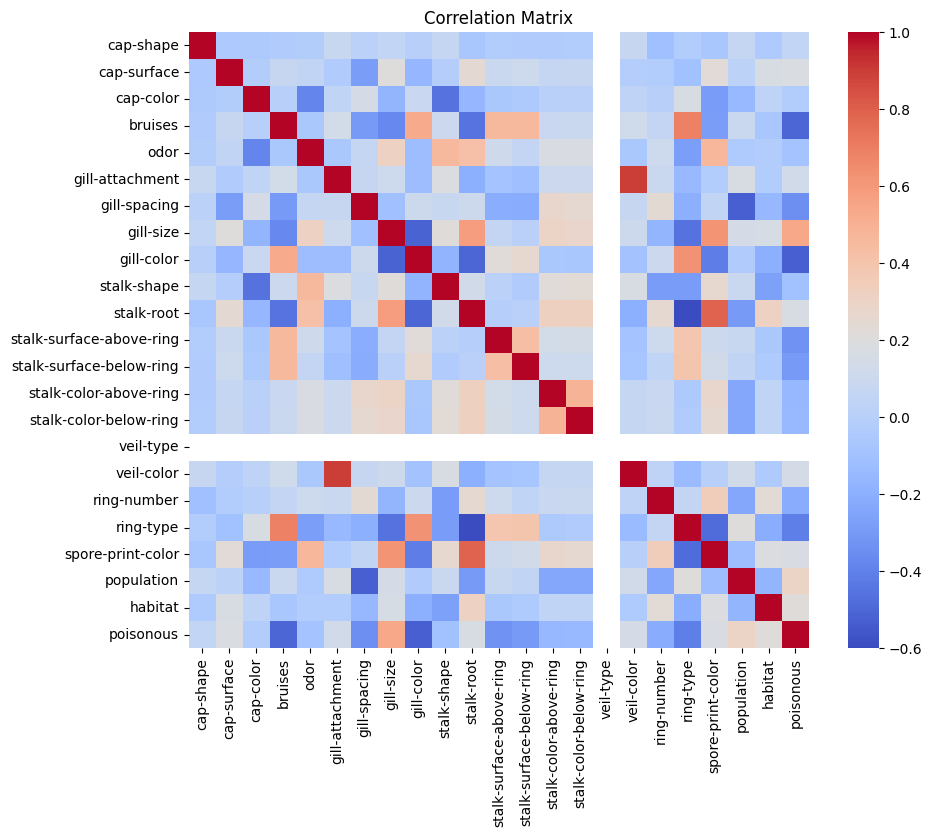

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df2=df.copy()
df2.drop(['veil-type','stalk-root'],axis=1,inplace=True)
df2.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,2,1,0,3,0,1,0


In [ ]:
X = df2.drop('poisonous', axis=1)  # Replace 'class' with the actual column name if different
y = df2['poisonous']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Multinomial Naive Bayes for Classification

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = mnb.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(accuracy)
print(report)

0.8112644535621036
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1378
           1       0.91      0.68      0.78      1303

    accuracy                           0.81      2681
   macro avg       0.83      0.81      0.81      2681
weighted avg       0.83      0.81      0.81      2681



In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5], ["Edible", "Poisonous"])
    plt.yticks([0.5, 1.5], ["Edible", "Poisonous"])
    plt.show()

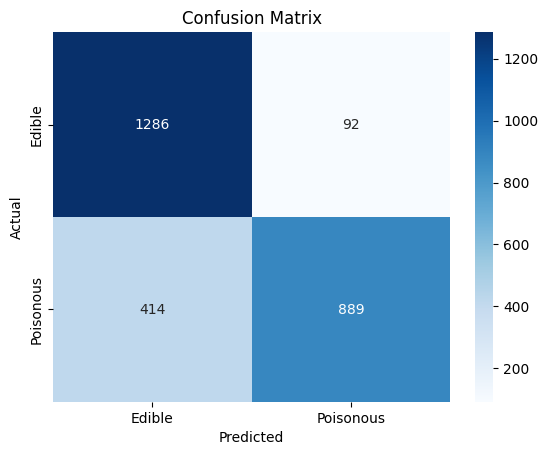

In [ ]:
plot_confusion_matrix(y_test, y_pred)

Gaussian Naive Bayes using Drug200 dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
df=pd.read_csv('/content/drug200.csv')

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
for col in df.columns:
  print(col, df[col].unique())

Age [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Na_to_K [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.2

Label Encoding the Text Categorical data

In [ ]:
label_encoders = {}
for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,1.595000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.716305
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,0.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,1.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


In [ ]:
X = df.drop('Drug', axis=1)  # Replace 'class' with the actual column name if different
y = df['Drug']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Gaussian Naive Bayes Accuracy: {accuracy:.2f}")

Gaussian Naive Bayes Accuracy: 0.89


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        29
           1       0.89      1.00      0.94         8
           2       0.57      1.00      0.73         4
           3       0.67      1.00      0.80         6
           4       1.00      1.00      1.00        19

    accuracy                           0.89        66
   macro avg       0.83      0.95      0.87        66
weighted avg       0.93      0.89      0.90        66



In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    class_names = ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

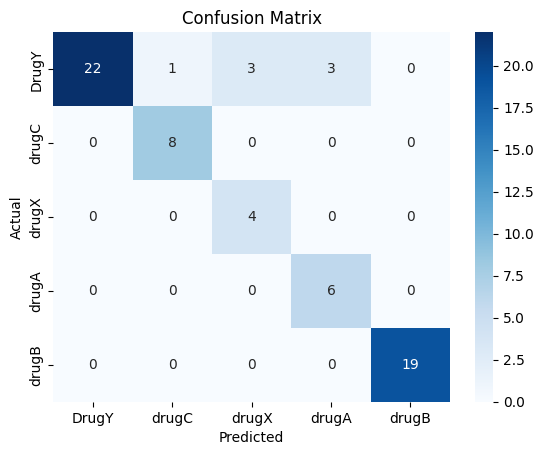

In [ ]:
plot_confusion_matrix(y_test,y_pred)